In [179]:
import pandas as pd
import numpy as np

In [180]:
df = pd.read_csv('Churn_Modelling.csv')

In [146]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
df.shape

(10000, 14)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [149]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [150]:
df.duplicated().sum()

0

In [151]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [152]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [153]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [154]:
df.drop(columns=['RowNumber' , 'CustomerId', 'Surname'] , inplace=True)

In [155]:
df = pd.get_dummies(df , columns=['Geography' , 'Gender'],drop_first=True , dtype=int)

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [158]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y ,
                                                     test_size=0.2,
                                                     random_state=1)

In [159]:
X_train.shape

(8000, 11)

In [160]:
X_test.shape

(2000, 11)

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()

In [163]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
X_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [165]:
X_test

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [199]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [200]:
model = Sequential()

In [201]:
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [202]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [203]:
#model compilation scale

In [204]:
model.compile(loss='binary_crossentropy' , optimizer='Adam', metrics=['accuracy'])

In [205]:
history = model.fit(X_train , y_train , epochs=50 , validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6909 - loss: 0.5938 - val_accuracy: 0.7975 - val_loss: 0.4725
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4552 - val_accuracy: 0.8037 - val_loss: 0.4453
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.4273 - val_accuracy: 0.8131 - val_loss: 0.4263
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8167 - loss: 0.4203 - val_accuracy: 0.8206 - val_loss: 0.4087
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8381 - loss: 0.4018 - val_accuracy: 0.8294 - val_loss: 0.3885
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3824 - val_accuracy: 0.8400 - val_loss: 0.3743
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.3822 - val_accuracy: 0.8500 - val_loss: 0.3638
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3545 - val_accuracy: 0.

In [206]:
model.layers[0].get_weights()

[array([[ 0.01089738, -0.03252509, -0.00363042,  0.08147869, -0.09532242,
         -0.12505136, -0.04129659,  0.03459677, -0.09063365,  0.5938439 ,
          0.67830473],
        [-0.11176431,  0.9441483 , -0.6062732 , -0.3766662 , -0.09920815,
          0.12321773,  1.2359496 ,  0.16081266,  0.7091428 , -0.04870052,
         -0.14663833],
        [ 0.1280731 ,  0.3142944 , -0.4146244 , -0.01345921,  0.13685133,
         -0.01323259,  0.01496989,  0.02562291,  0.12518653, -0.03911748,
         -0.52969474],
        [ 0.09775253,  0.04458909, -0.07460153, -0.06695286,  0.17087674,
         -0.11177469, -0.30481339,  0.42041573, -0.08167882,  0.23552892,
          0.13779517],
        [ 0.21603797,  0.00866047,  0.16211662,  0.32629442,  0.46789512,
         -0.8797343 , -0.434453  ,  0.9475338 ,  1.2096072 , -0.34820372,
          0.15215065],
        [ 0.38782737, -0.20714334, -0.14345777, -0.15761715, -0.3046633 ,
         -0.48592058, -0.09307045, -0.07392374,  0.16034846, -0.2941   

In [207]:
model.layers[1].get_weights()

[array([[-0.33552963,  0.6780203 , -0.22983252,  0.50825423,  0.4192703 ,
          0.2745113 , -0.5426796 ,  0.4780167 ,  0.0277303 ,  0.21206555,
         -0.05198386],
        [-0.2541158 ,  0.63949025, -0.42889223, -0.41537893, -0.25146598,
          0.13773276, -0.04225814, -0.2794485 , -0.5264511 ,  0.31568715,
         -0.48682195],
        [-0.18279389,  0.47729102, -0.06021729, -0.07227904,  0.34389877,
          0.37682164, -0.13714996,  0.30786008, -0.19685128, -0.02550768,
          0.27775863],
        [-0.49636075,  0.17242467, -0.38540766,  0.38958523,  0.58843416,
          0.5620219 , -0.33115232,  0.24833752, -0.32700258, -0.18251061,
          0.44685867],
        [-0.46710387, -0.48519433,  0.4679023 ,  0.26713377, -0.12127827,
         -0.07026841,  0.05519391, -0.07345327, -0.32663813,  0.42963126,
          0.23816901],
        [ 0.31007102, -0.3866299 , -0.23628953,  0.3249287 ,  0.05877173,
          0.22779422, -0.01151099,  0.5873637 , -0.1734424 ,  0.0595121

In [208]:
model.layers[2].get_weights()

[array([[-0.5222022 ],
        [-0.73433775],
        [-1.4561886 ],
        [-1.0073718 ],
        [-0.13341668],
        [-0.41620186],
        [ 0.8609157 ],
        [ 0.9203661 ],
        [ 1.144923  ],
        [-0.917288  ],
        [-0.5253256 ]], dtype=float32),
 array([0.0567475], dtype=float32)]

In [209]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [210]:
y_pred = np.where(y_log>0.5 ,1,0)

In [211]:
from sklearn.metrics import accuracy_score

In [212]:
accuracy_score(y_test ,y_pred)

0.8615

In [213]:
import matplotlib.pyplot as plt

In [214]:
history.history

{'accuracy': [0.7632812261581421,
  0.8012499809265137,
  0.8123437762260437,
  0.8245312571525574,
  0.8365625143051147,
  0.848437488079071,
  0.8526562452316284,
  0.8581249713897705,
  0.8578125238418579,
  0.8595312237739563,
  0.8596875071525574,
  0.8604687452316284,
  0.859375,
  0.8603125214576721,
  0.860156238079071,
  0.8607812523841858,
  0.8610937595367432,
  0.8621875047683716,
  0.8603125214576721,
  0.86328125,
  0.862500011920929,
  0.8631250262260437,
  0.8629687428474426,
  0.8637499809265137,
  0.8618749976158142,
  0.8635937571525574,
  0.8637499809265137,
  0.8643749952316284,
  0.8639062643051147,
  0.8635937571525574,
  0.86328125,
  0.8637499809265137,
  0.8628125190734863,
  0.8646875023841858,
  0.8628125190734863,
  0.8650000095367432,
  0.8659374713897705,
  0.8642187714576721,
  0.8657812476158142,
  0.8671875,
  0.8634374737739563,
  0.8650000095367432,
  0.8656250238418579,
  0.8660937547683716,
  0.864062488079071,
  0.8637499809265137,
  0.86546874046

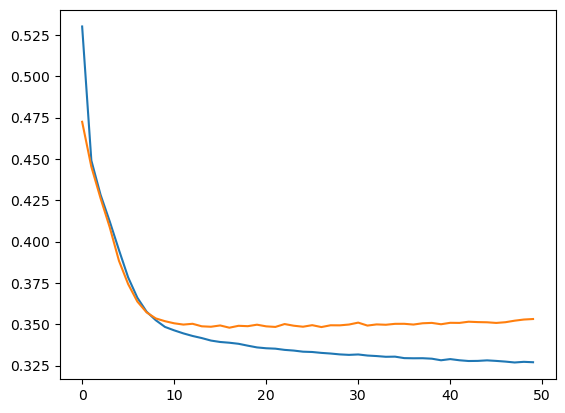

In [216]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

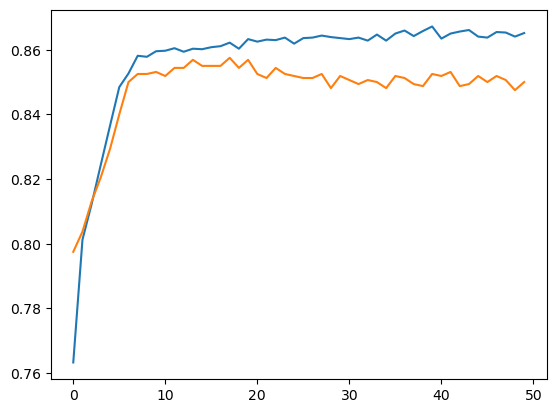

In [217]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])